# **Análise dos dados de combustíveis de Junho a Julho de 2023 (ANP)**

- Espaço destinado para a Descrição do projeto

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
# Importando dados do mês de Junho
dados_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv", sep=(";"))
# Importando dados do mês de Julho
dados_julho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-07.csv", sep=(";"))

# Concatenando as tabelas
dados = pd.concat([dados_junho, dados_julho,], ignore_index=True)

In [3]:
# Resetando o Index do DataFrame dados:
dados.reset_index(0,drop=True,inplace = True)

# Exclusão da coluna Valor de Compra, pois não contém valores
dados.drop('Valor de Compra',axis=1,inplace=True)
# Exclusão da coluna Complemento
dados.drop('Complemento', axis=1, inplace=True)

# Muda os valores da coluna Valor de Venda pra "float"
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.').astype(float)

In [36]:
valores_nulos = dados.isna().sum()
valores_nulos

Regiao - Sigla         0
Estado - Sigla         0
Municipio              0
Revenda                0
CNPJ da Revenda        0
Nome da Rua            0
Numero Rua            38
Bairro               224
Cep                    0
Produto                0
Data da Coleta         0
Valor de Venda         0
Unidade de Medida      0
Bandeira               0
dtype: int64

In [5]:
# Chamando o DataFrame com suas 5 primeiras linhas
dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,ETANOL,01/06/2023,4.31,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,GASOLINA,01/06/2023,5.39,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,ETANOL,01/06/2023,4.19,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,5.36,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA,01/06/2023,5.29,R$ / litro,VIBRA ENERGIA


In [6]:
# Utilização do describe para medir dados irreais
dados['Valor de Venda'].describe().round(2)

count    103556.00
mean          5.08
std           0.84
min           2.79
25%           4.49
50%           5.35
75%           5.69
max           8.39
Name: Valor de Venda, dtype: float64

<Axes: >

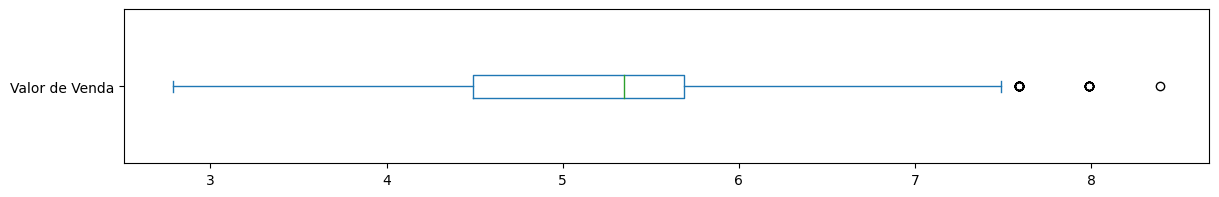

In [7]:
# Utilização do boxplot para ver melhor dados irreais
dados['Valor de Venda'].plot.box(vert=False, figsize=(14,2))

In [8]:
# Criação do DataFrame da Gasolina
dados_gasolina = dados[(dados['Produto'] == 'GASOLINA') ]
dados_gasolina.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,GASOLINA,01/06/2023,5.39,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA,01/06/2023,5.29,R$ / litro,VIBRA ENERGIA
6,SE,ES,COLATINA,POSTO BARBADOS LTDA,02.806.627/0001-60,BR 259 KM 46,S/N,BARBADOS,29700-778,GASOLINA,01/06/2023,5.59,R$ / litro,RAIZEN
9,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,05.791.319/0001-04,RODOVIA GETHER LOPES DE FARIAS,2600,CARLOS GERMANO NAUMANN,29705-390,GASOLINA,01/06/2023,5.55,R$ / litro,VIBRA ENERGIA
12,SE,ES,COLATINA,POSTO ARNALDO LTDA,27.495.696/0001-20,AVENIDA SILVIO AVIDOS,"2,331",VILA AMELIA,29706-297,GASOLINA,01/06/2023,5.59,R$ / litro,IPIRANGA


In [9]:
# Criação do DataFrame da Gasolina Aditivada
dados_gasolina_aditivada = dados[(dados['Produto'] == 'GASOLINA ADITIVADA') ]
dados_gasolina_aditivada.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,5.36,R$ / litro,VIBRA ENERGIA
5,SE,ES,COLATINA,POSTO BARBADOS LTDA,02.806.627/0001-60,BR 259 KM 46,S/N,BARBADOS,29700-778,GASOLINA ADITIVADA,01/06/2023,5.79,R$ / litro,RAIZEN
8,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,05.791.319/0001-04,RODOVIA GETHER LOPES DE FARIAS,2600,CARLOS GERMANO NAUMANN,29705-390,GASOLINA ADITIVADA,01/06/2023,5.75,R$ / litro,VIBRA ENERGIA
11,SE,ES,COLATINA,POSTO ARNALDO LTDA,27.495.696/0001-20,AVENIDA SILVIO AVIDOS,"2,331",VILA AMELIA,29706-297,GASOLINA ADITIVADA,01/06/2023,5.69,R$ / litro,IPIRANGA
13,SE,ES,COLATINA,POSTO DE GASOLINA SANTO ANTONIO LTDA,27.085.240/0001-92,AVENIDA SILVIO AVIDOS,3251,SANTO ANTONIO,29704-053,GASOLINA ADITIVADA,01/06/2023,5.69,R$ / litro,IPIRANGA


In [10]:
# Criação do DataFrame do Etanol
dados_etanol = dados[(dados['Produto'] == 'ETANOL') ]
dados_etanol.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,ETANOL,01/06/2023,4.31,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,ETANOL,01/06/2023,4.19,R$ / litro,VIBRA ENERGIA
7,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,05.791.319/0001-04,RODOVIA GETHER LOPES DE FARIAS,2600,CARLOS GERMANO NAUMANN,29705-390,ETANOL,01/06/2023,4.79,R$ / litro,VIBRA ENERGIA
10,SE,ES,COLATINA,POSTO ARNALDO LTDA,27.495.696/0001-20,AVENIDA SILVIO AVIDOS,"2,331",VILA AMELIA,29706-297,ETANOL,01/06/2023,4.67,R$ / litro,IPIRANGA
15,CO,GO,CATALAO,POSTO CATALAO LTDA,01.128.537/0001-02,RUA DR PEDRO LUDOVICO,309,CENTRO,75700-103,ETANOL,01/06/2023,3.89,R$ / litro,VIBRA ENERGIA


## **Perguntas e análises**

### **1 - Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?**

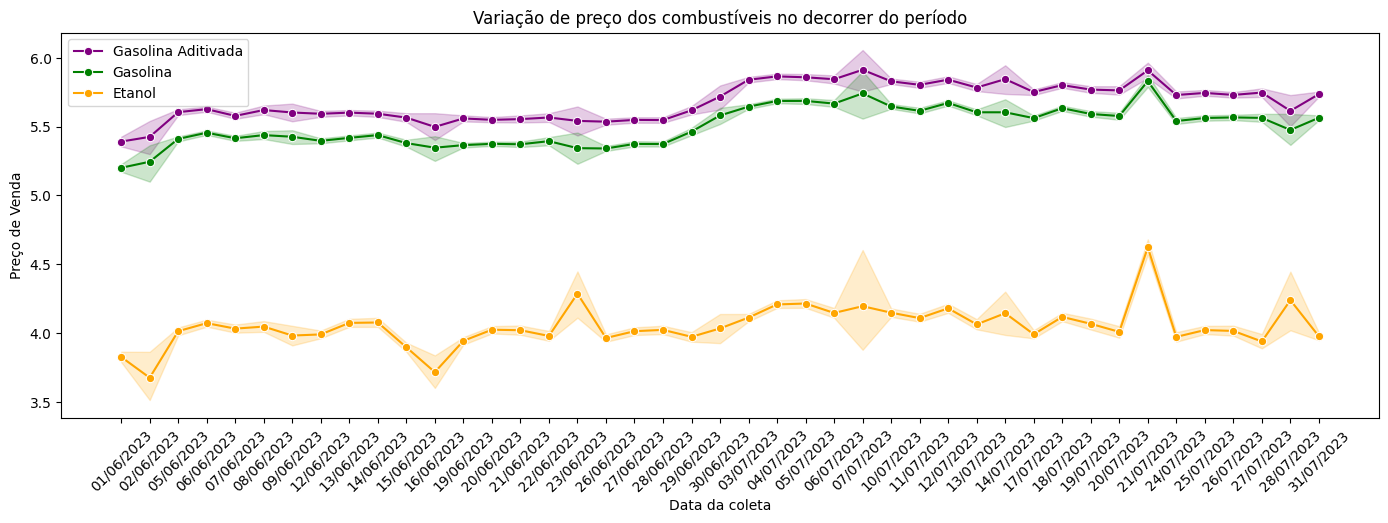

In [11]:
# Criação do gráfico que mostra a variação de preço dos combustíveis nos meses de Junho e Julho

plt.figure(figsize=(17,5))
sns.lineplot(data=dados_gasolina_aditivada, x='Data da Coleta', y='Valor de Venda', marker='o', color='purple', label='Gasolina Aditivada')
sns.lineplot(data=dados_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina')
sns.lineplot(data=dados_etanol, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Etanol')
plt.xlabel('Data da coleta')
plt.ylabel('Preço de Venda')
plt.title('Variação de preço dos combustíveis no decorrer do período')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- Espaço destinado para análise exploratória

### **2 - Qual o preço médio da gasolina e do etanol nesses dois meses?**

In [12]:
# Agrupa os combustíveis e faz uma média dos valores
media_de_combustiveis = dados.groupby('Produto')['Valor de Venda'].mean()
media_de_combustiveis.round(2)

Produto
ETANOL                4.04
GASOLINA              5.51
GASOLINA ADITIVADA    5.69
Name: Valor de Venda, dtype: float64

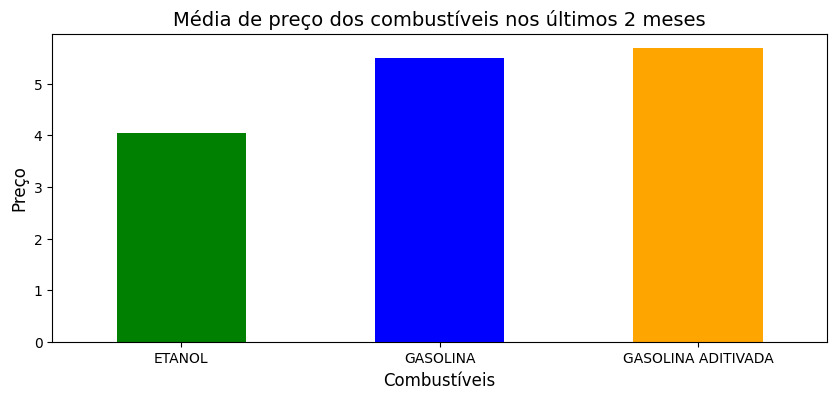

In [13]:
# calculando a média
media_de_combustiveis = dados.groupby('Produto')['Valor de Venda'].mean()

#criação do gráfico de barras
media_de_combustiveis.plot(kind='bar', figsize=(10,5), rot=0, color=['green', 'blue', 'orange'])
plt.title('Média de preço dos combustíveis nos últimos 2 meses', fontsize = 14)
plt.ylabel('Preço', fontsize = 12)
plt.xlabel('Combustíveis', fontsize = 12)
plt.show()

- Espaço destinado para análise exploratória

### **3 - Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

In [14]:
# Calcular os preços médios por estado para gasolina, etanol e gasolina aditivada
media_gasolina_aditivada = dados_gasolina_aditivada.groupby('Estado - Sigla')['Valor de Venda'].mean()
media_gasolina = dados_gasolina.groupby('Estado - Sigla')['Valor de Venda'].mean()
media_etanol = dados_etanol.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Criar um DataFrame com os preços médios por estado
df_precos_medios = pd.DataFrame({
    'Aditivada': media_gasolina_aditivada})
df_precos_medios2 = pd.DataFrame({
    'Gasolina': media_gasolina})
df_precos_medios3 = pd.DataFrame({
    'Etanol': media_etanol})

aditivada_estados = df_precos_medios.sort_values(by='Aditivada', ascending = False).head(5)
gasolina_estados = df_precos_medios2.sort_values(by='Gasolina', ascending = False).head(5)
etanol_estados = df_precos_medios3.sort_values(by='Etanol', ascending = False).head(5)
print(aditivada_estados,'\n')
print(gasolina_estados,'\n')
print(etanol_estados)

                Aditivada
Estado - Sigla           
AC               6.304203
AM               6.278139
RO               6.095025
RR               5.920444
TO               5.903172 

                Gasolina
Estado - Sigla          
AC              6.339545
AM              6.314297
RO              6.016365
RR              5.842083
TO              5.793946 

                  Etanol
Estado - Sigla          
AP              5.246667
RR              5.115517
RO              5.012737
RS              4.839457
AC              4.809221


- Espaço destinado para análise exploratória

### **4 - Qual o preço médio do Etanol da Gasolina e Gasolina Aditivada por Estado (BR)?**

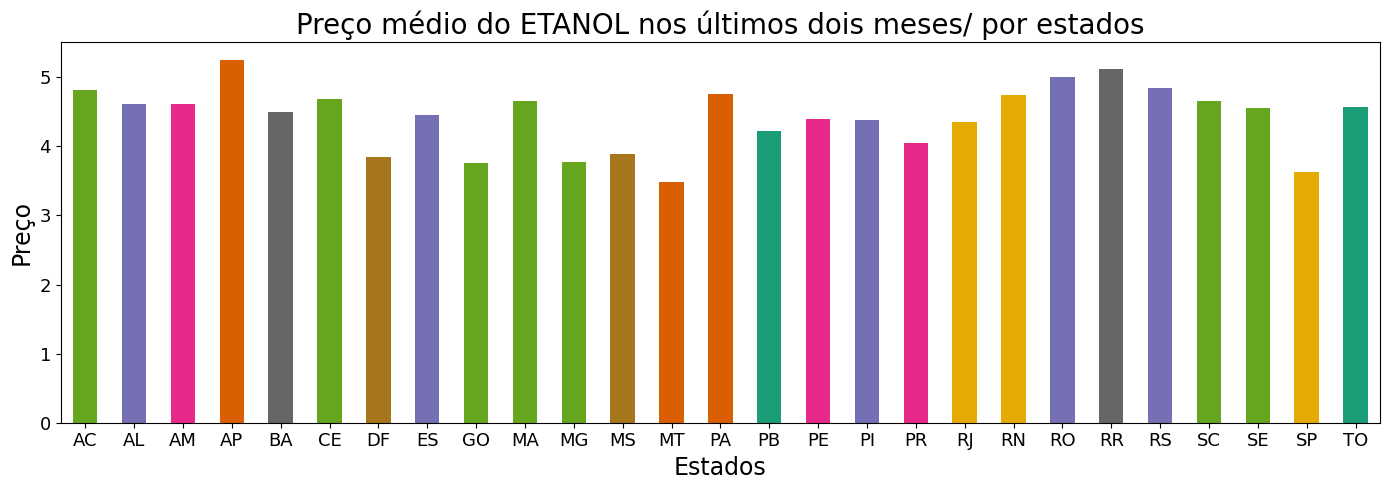

In [15]:
preco_etanol_medio = dados[dados['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]
data = np.random.rand(num_columns) * 30  # Dados aleatórios

fig, ax = plt.subplots(figsize=(14, 5))
preco_etanol_medio.plot(kind='bar', rot=0, fontsize = 13, color= colors)

plt.title('Preço médio do ETANOL nos últimos dois meses/ por estados', fontsize = 20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.tight_layout()
plt.show()

- Espaço destinado para análise exploratória

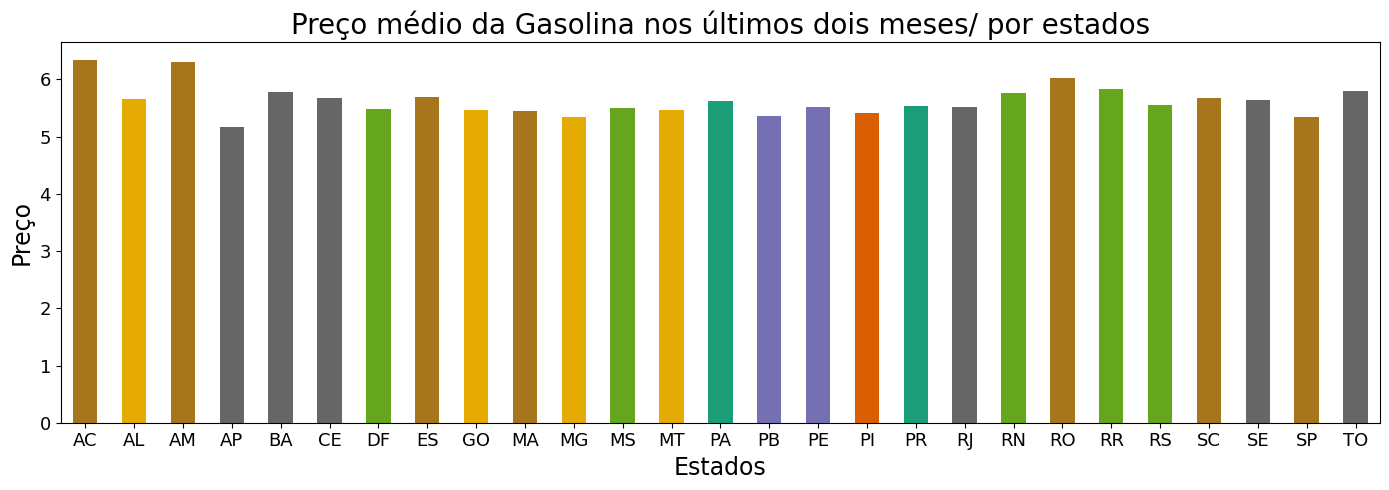

In [16]:
preco_gasolina_medio = dados[dados['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]
data = np.random.rand(num_columns) * 30  # Dados aleatórios

fig, ax = plt.subplots(figsize=(14, 5))
preco_gasolina_medio.plot(kind='bar', rot=0, fontsize = 13, color=colors)

plt.title('Preço médio da Gasolina nos últimos dois meses/ por estados', fontsize =20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.tight_layout()
plt.show()

- Espaço destinado para análise exploratória

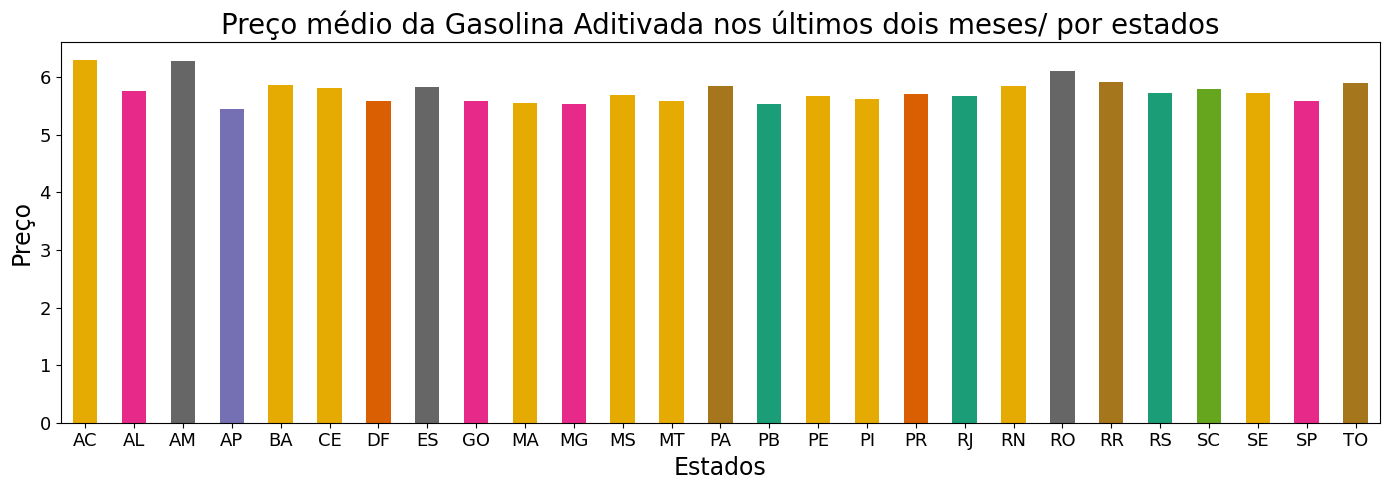

In [17]:
preco_gasolina_aditivada_medio = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]
data = np.random.rand(num_columns) * 100  # Dados aleatórios

fig, ax = plt.subplots(figsize=(14, 5))
preco_gasolina_aditivada_medio.plot(kind='bar', rot=0, fontsize = 13, color=colors)

plt.title('Preço médio da Gasolina Aditivada nos últimos dois meses/ por estados', fontsize = 20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.tight_layout()
plt.show()

- Espaço destinado para análise exploratória

### **5 - Qual o município que possui o menor preço para a gasolina e para o etanol?**

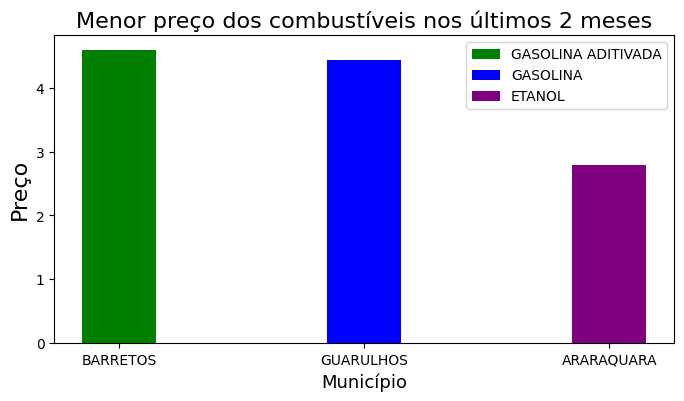

In [19]:
# gráficos e legendas
fig, ax = plt.subplots(figsize=(10,5));
plt.xlabel('Município', fontsize=13)
plt.ylabel('Preço', fontsize=16)
plt.title('Menor preço dos combustíveis nos últimos 2 meses', fontsize=16)

# Atribuindo os dados da Gasolina aditivada
gasolina_aditivada_menor = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio = gasolina_aditivada_menor.idxmin() # Buscando os valores
valor_menor = gasolina_aditivada_menor.min()
plt.bar(menor_municipio, valor_menor, color='green', width=0.3, label = 'GASOLINA ADITIVADA') # criação da barra

# Atribuindo os dados da Gasolina
gasolina_menor = dados[dados['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio2 = gasolina_menor.idxmin() # Buscando os valores
valor_menor2 = gasolina_menor.min()
plt.bar(menor_municipio2, valor_menor2, color='blue', width=0.3, label = 'GASOLINA') # criação da barra

# Atribuindo os dados do Etanol
etanol_menor = dados[dados['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio3 = etanol_menor.idxmin() # Buscando os valores
valor_menor3 = etanol_menor.min()
plt.bar(menor_municipio3, valor_menor3, color='purple', width=0.3, label = 'ETANOL') # criação da barra

# Mostra o Gráfico
plt.legend()
plt.show()

- Espaço destinado para análise exploratória

### **6 - Qual o município que possui o maior preço para a gasolina e para o etanol?**

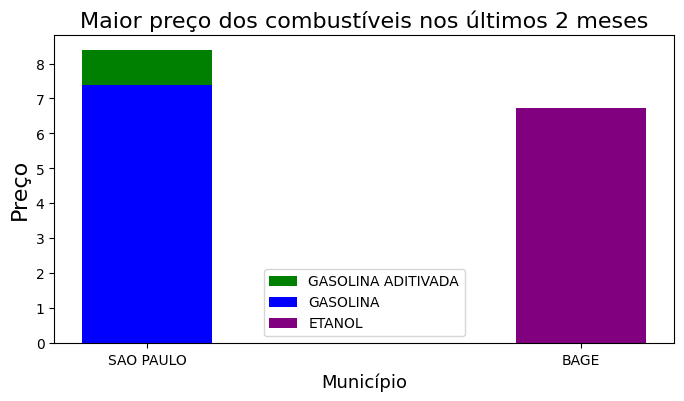

In [20]:
# Gráficos e legendas
fig, ax = plt.subplots(figsize=(10,5));
plt.xlabel('Município', fontsize=13)
plt.ylabel('Preço', fontsize=16)
plt.title('Maior preço dos combustíveis nos últimos 2 meses', fontsize=16)

# Atribuindo os dados da Gasolina aditivada
gasolina_aditivada_maior = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio = gasolina_aditivada_maior.idxmax() # Buscando os valores
valor_maior = gasolina_aditivada_maior.max()
plt.bar(maior_municipio, valor_maior, color='green', width=0.3, label = 'GASOLINA ADITIVADA') # criação da barra

# Atribuindo os dados da Gasolina
gasolina_maior = dados[dados['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio2 = gasolina_maior.idxmax() # Buscando os valores
valor_maior2 = gasolina_maior.max()
plt.bar(maior_municipio2, valor_maior2, color='blue', width=0.3, label = 'GASOLINA') # criação da barra

# Atribuindo os dados do Etanol
etanol_maior = dados[dados['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio3 = etanol_maior.idxmax() # Buscando os valores
valor_maior3 = etanol_maior.max()
plt.bar(maior_municipio3, valor_maior3, color='purple', width=0.3, label = 'ETANOL') # criação da barra

# Mostra o gráfico
plt.legend()
plt.show()

- Espaço destinado para análise exploratória

### **7 - Qual a região que possui o maior valor médio da gasolina?**

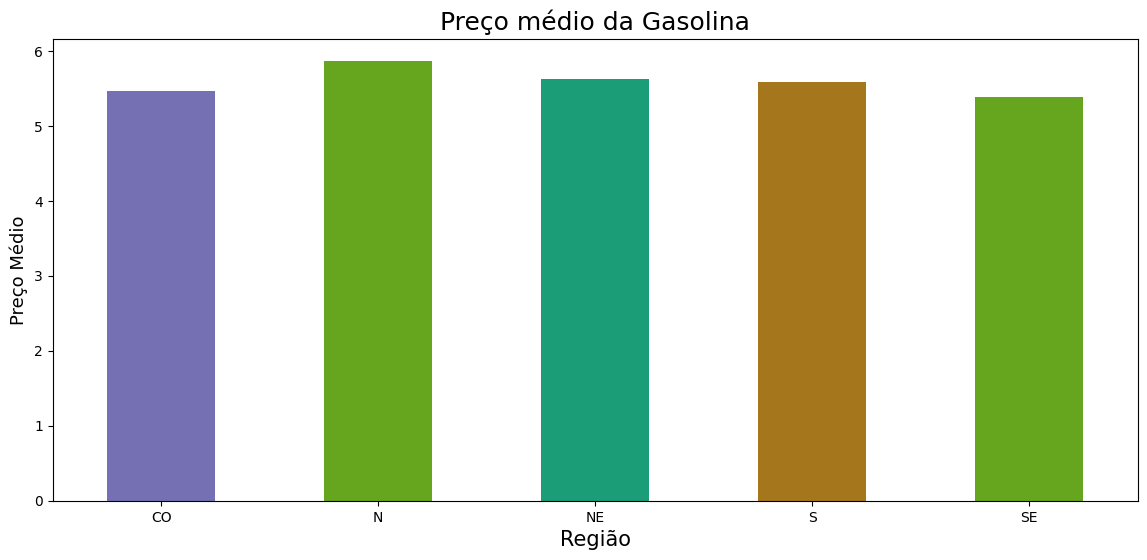

In [33]:
# Atribuindo os dados da Gasolina
media_por_regiao = dados[dados['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors
data = np.random.rand(num_columns) *5  # Dados aleatórios

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(14, 6))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

plt.title('Preço médio da Gasolina', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()

- Espaço destinado para análise exploratória

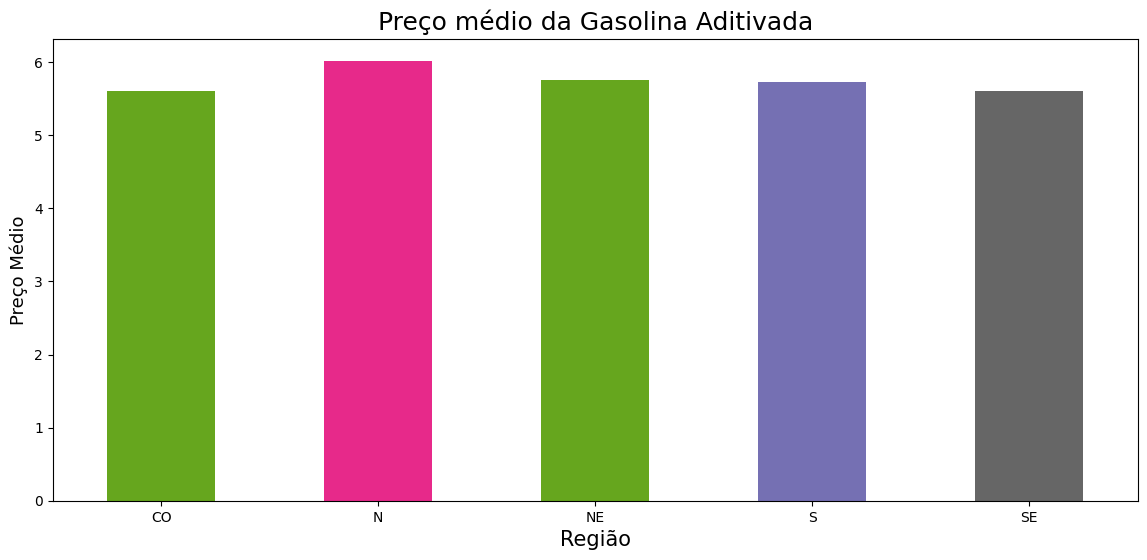

In [34]:
# Atribuindo os dados da Gasolina Aditivada
media_por_regiao = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors
data = np.random.rand(num_columns) * 5  # Dados aleatórios

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(14, 6))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

plt.title('Preço médio da Gasolina Aditivada', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()

- Espaço destinado para análise exploratória

### **8 - Qual a região que possui o menor valor médio do etanol?**

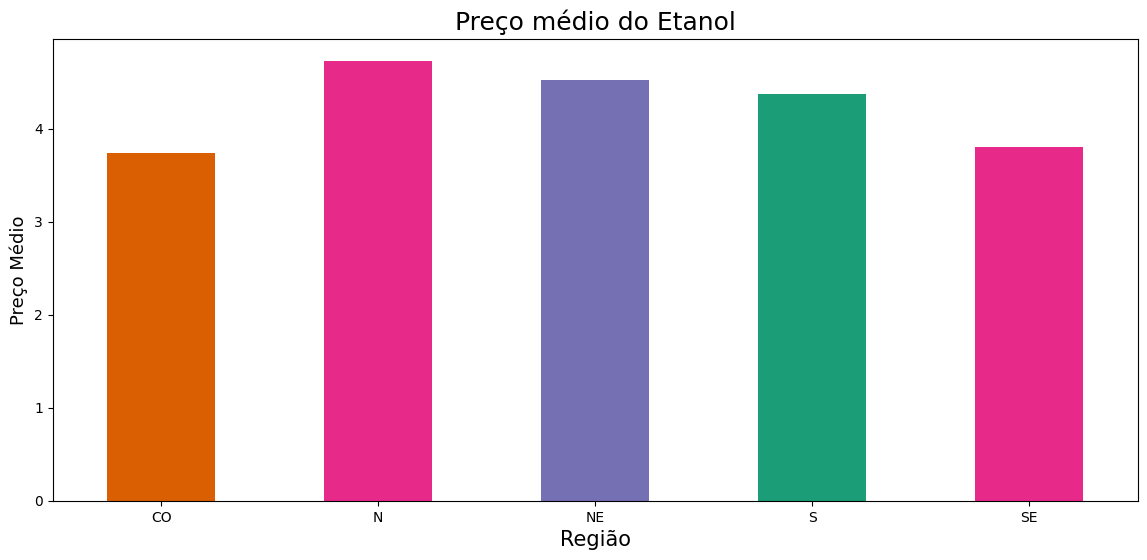

In [35]:
# Atribuindo os dados do Etanol
media_por_regiao = dados[dados['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors
data = np.random.rand(num_columns) * 5  # Dados aleatórios

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(14, 6))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

plt.title('Preço médio do Etanol', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()

- Espaço destinado para análise exploratória

### **9 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?**

### **10 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?**

### **11 - Extra - Menores preços dos combustíveis, por Revendedor**

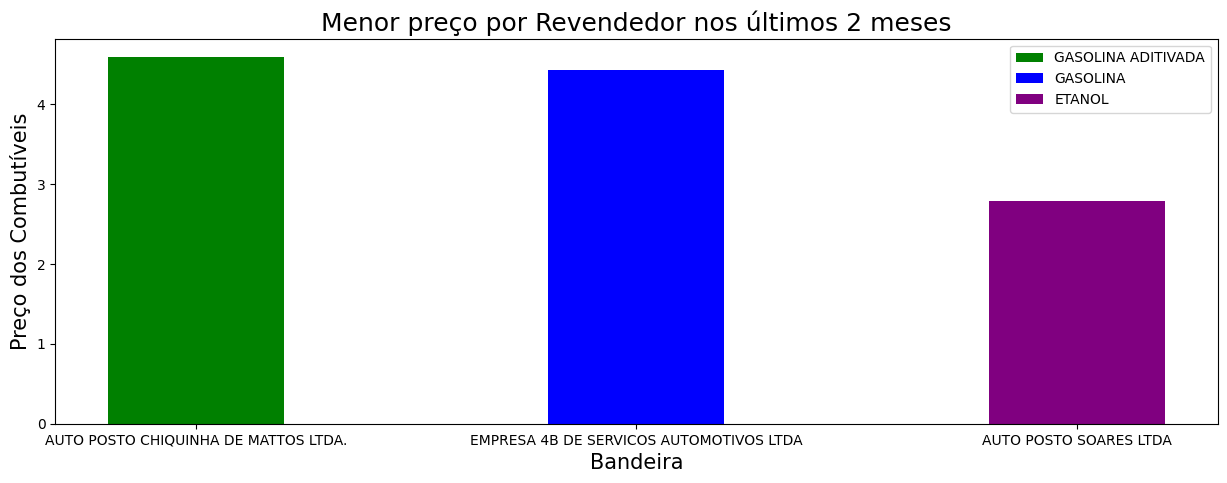

In [105]:
# Gráficos e legendas
fig, ax = plt.subplots(figsize=(15, 5));
plt.xlabel('Bandeira', fontsize = 15)
plt.ylabel('Preço dos Combutíveis', fontsize = 15)
plt.title('Menor preço por Revendedor nos últimos 2 meses', fontsize = 18)

# Atribuindo os dados da Gasolina Aditivada
menor_aditivada_revenda = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda = menor_aditivada_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_aditivada = menor_aditivada_revenda.min()
plt.bar(menor_preco_revenda, menor_preco_aditivada, color='green', width=0.4, label = 'GASOLINA ADITIVADA') # Criação da barra

# Atribuindo os dados da Gasolina
menor_gasolina_revenda = dados[dados['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda2 = menor_gasolina_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina = menor_gasolina_revenda.min()
plt.bar(menor_preco_revenda2, menor_preco_gasolina, color='blue', width=0.4, label = 'GASOLINA') # Criação da barra

# Atribuindo os dados da Gasolina
menor_etanol_revenda= dados[dados['Produto'] == 'ETANOL'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda3 = menor_etanol_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_etanol = menor_etanol_revenda.min()
plt.bar(menor_preco_revenda3, menor_preco_etanol, color='purple', width=0.4, label = 'ETANOL') # Criação da barra

plt.legend()
plt.show()

- Espaço destinado para análise exploratória

### **12 - Extra - Comparando preços dos Estados: Pernambuco, São Paulo e Acre, dos últimos 2 meses**

In [131]:
# Filtrando os dados apenas de 3 estados
dados_pernambuco = dados[dados['Estado - Sigla'] == 'PE']
dados_pernambuco.reset_index(0,drop=True,inplace = True)
dados_pernambuco_gasolina = dados_pernambuco[(dados_pernambuco['Produto'] == 'GASOLINA') ]

dados_saopaulo = dados[dados['Estado - Sigla'] == 'SP']
dados_saopaulo.reset_index(0,drop=True,inplace = True)
dados_saopaulo_gasolina = dados_saopaulo[(dados_saopaulo['Produto'] == 'GASOLINA') ]

dados_acre = dados[dados['Estado - Sigla'] == 'AC']
dados_acre.reset_index(0,drop=True,inplace = True)
dados_acre_gasolina = dados_acre[(dados_acre['Produto'] == 'GASOLINA') ]

concatenated_df = pd.concat([dados_pernambuco_gasolina, dados_saopaulo_gasolina, dados_acre_gasolina], ignore_index=True)
concatenated_df.describe()

,Valor de Venda
count,12316.000000
mean,5.378650
std,0.389603
min,4.430000
25%,5.140000
50%,5.360000
75%,5.570000
max,7.390000


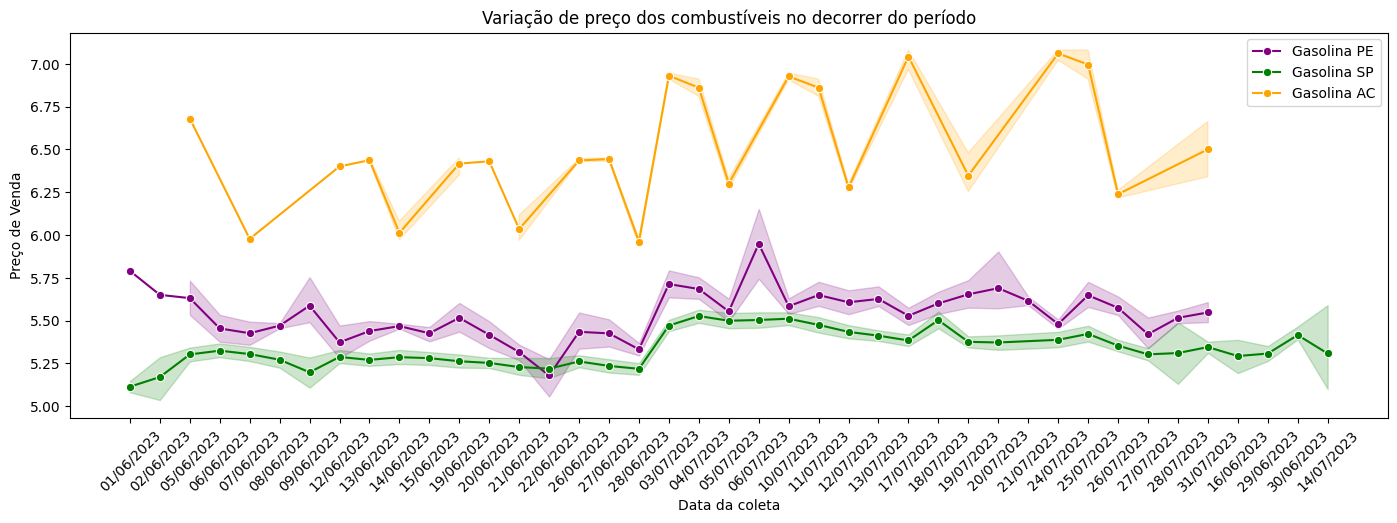

In [130]:
# Criação do gráfico que mostra a variação de preço dos combustíveis nos meses de Junho e Julho

plt.figure(figsize=(17,5))
sns.lineplot(data=dados_pernambuco_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='purple', label='Gasolina PE')
sns.lineplot(data=dados_saopaulo_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina SP')
sns.lineplot(data=dados_acre_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Gasolina AC')
plt.xlabel('Data da coleta')
plt.ylabel('Preço de Venda')
plt.title('Variação de preço dos combustíveis no decorrer do período')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### **13 - Extra - Menores preços de Gasolina por revendedor nos 3 estados: Pernambuco, São Paulo e Acre**

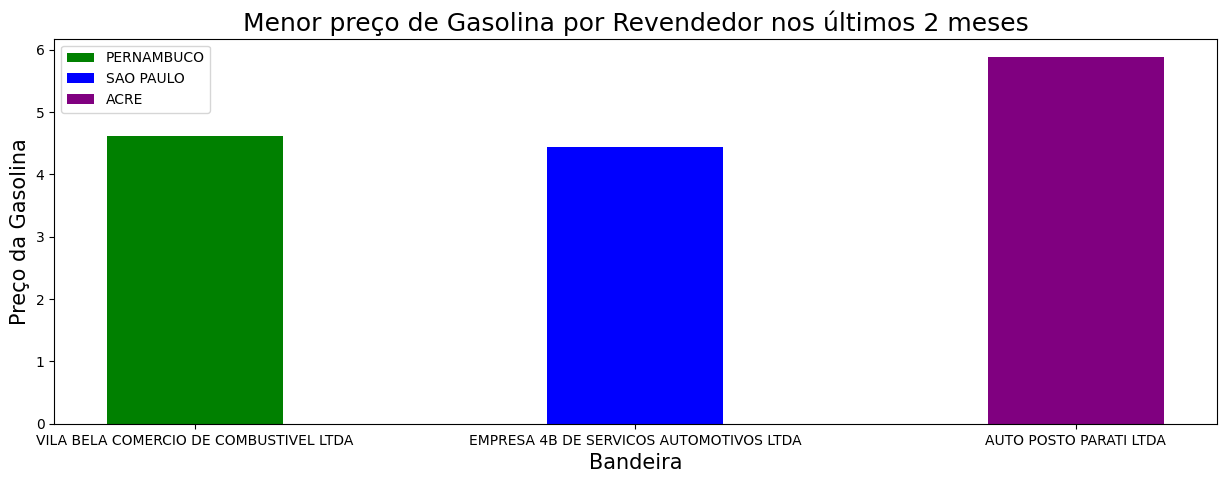

In [140]:
# Gráficos e legendas
fig, ax = plt.subplots(figsize=(15, 5));
plt.xlabel('Bandeira', fontsize = 15)
plt.ylabel('Preço da Gasolina', fontsize = 15)
plt.title('Menor preço de Gasolina por Revendedor nos últimos 2 meses', fontsize = 18)

# Atribuindo os dados da Gasolina Aditivada
menor_gasolina_revenda = dados_pernambuco[dados_pernambuco['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda = menor_gasolina_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina = menor_gasolina_revenda.min()
plt.bar(menor_preco_revenda, menor_preco_gasolina, color='green', width=0.4, label = 'PERNAMBUCO') # Criação da barra

# Atribuindo os dados da Gasolina
menor_gasolina_revenda2 = dados_saopaulo[dados_saopaulo['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda2 = menor_gasolina_revenda2.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina2 = menor_gasolina_revenda2.min()
plt.bar(menor_preco_revenda2, menor_preco_gasolina2, color='blue', width=0.4, label = 'SAO PAULO') # Criação da barra

# Atribuindo os dados da Gasolina
menor_gasolina_revenda3= dados_acre[dados_acre['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda3 = menor_gasolina_revenda3.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina3 = menor_gasolina_revenda3.min()
plt.bar(menor_preco_revenda3, menor_preco_gasolina3, color='purple', width=0.4, label = 'ACRE') # Criação da barra

plt.legend()
plt.show()